프로젝트


문제정의 : 다음분기에 어떤 게임을 설계해야할까

In [2]:
# 데이터 불러오기
import io
import pandas as pd
from google.colab import files
myfile = files.upload()

df = pd.read_csv(io.BytesIO(myfile['vgames2.csv']))


Saving vgames2.csv to vgames2.csv


In [4]:
# sales 단위 정립하기_K,M 제거 후 단위를 K로 정리
#한번만 실행
# NA_Sales
df.NA_Sales = (df.NA_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * df.NA_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1000).replace(['K','M'], [1 , 1000]).astype(int))
# EU_Sales
df.EU_Sales = (df.EU_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * df.EU_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1000).replace(['K','M'], [1 , 1000]).astype(int))
# JP_Sales
df.JP_Sales = (df.JP_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * df.JP_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1000).replace(['K','M'], [1 , 1000]).astype(int))
# Other_Sales
df.Other_Sales = (df.Other_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * df.Other_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1000).replace(['K','M'], [1 , 1000]).astype(int))

In [5]:
# 년도 값 재설정
for i in range(0,16597):
  if df['Year'][i] < 100:
    if df['Year'][i] < 50:
      df['Year'][i] = df['Year'][i] + 2000
    elif df['Year'][i] > 50:
      df['Year'][i] = df['Year'][i] + 1900
  else:
    pass
# 인덱스 이름변경
df = df.rename(columns={'Unnamed: 0':'Index'})

In [6]:
# Total sales 생성
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
# 장르별 전체 지역선호
df_genre = df.groupby(by=['Genre'])['Total_Sales'].sum()
# 장르별 북미 지역선호
df_genre_na = df.groupby(by=['Genre'])['NA_Sales'].sum()
# 장르별 유럽 지역선호
df_genre_eu = df.groupby(by=['Genre'])['EU_Sales'].sum()
# 장르별 일본 지역선호
df_genre_jp = df.groupby(by=['Genre'])['JP_Sales'].sum()
# 장르별 기타 지역선호
df_genre_other = df.groupby(by=['Genre'])['Other_Sales'].sum()

In [7]:
# 데이터 만들기
df1 = pd.concat([df_genre_na,df_genre_eu,df_genre_jp,df_genre_other,df_genre], axis=1)
df1 = df1.reset_index()
print(df1)
print(list(df1.columns))

           Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales
0         Action  874810.0  522160.0  157900.0     186450.0    1741320.0
1      Adventure  105660.0   64050.0   51950.0      16810.0     238470.0
2       Fighting  223200.0  101220.0   87340.0      36640.0     448400.0
3           Misc  408050.0  212360.0  105270.0      74040.0     799720.0
4       Platform  446440.0  201610.0  130650.0      51530.0     830230.0
5         Puzzle  123350.0   50730.0   56870.0      12520.0     243470.0
6         Racing  357190.0  237100.0   56400.0      77100.0     727790.0
7   Role-Playing  319540.0  183580.0  344950.0      56960.0     905030.0
8        Shooter  581920.0  313050.0   38280.0     102650.0    1035900.0
9     Simulation  182960.0  113350.0   63700.0      31480.0     391490.0
10        Sports  680520.0  376480.0  135370.0     134670.0    1327040.0
11      Strategy   68700.0   45320.0   49460.0      11360.0     174840.0
['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Othe

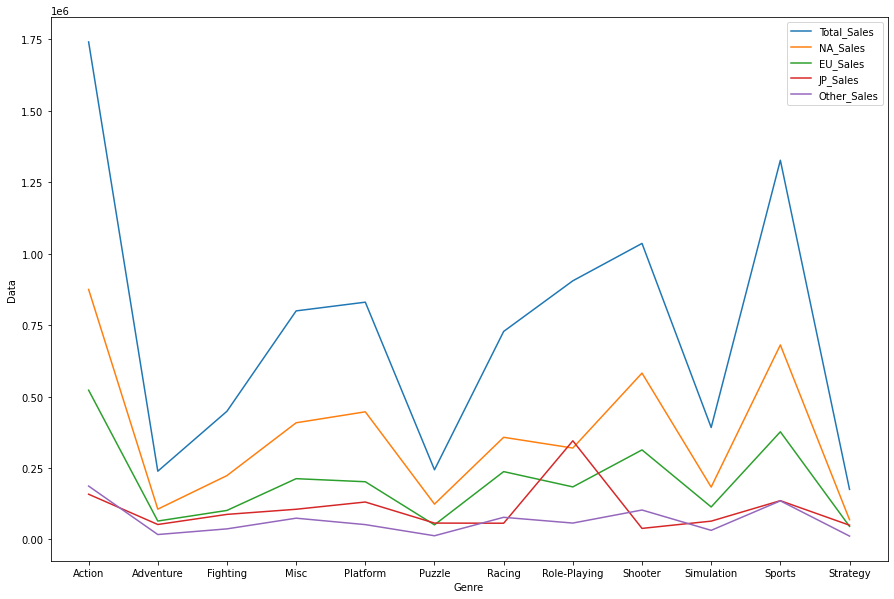

In [8]:
import matplotlib.pyplot as plt
import numpy as np
# 지역 데이터
df_genre        # 전체 지역
df_genre_na     # 북미
df_genre_eu     # 유럽
df_genre_jp     # 일본
df_genre_other  # 다른 지역

# 장르
Genre = df1['Genre'] 
# 선그래프 그리기
fig = plt.figure(figsize=(15, 10)) # 캔버스 생성
fig.set_facecolor('white') # 캔버스 색상 설정
ax = fig.add_subplot() # 프레임(그림 뼈대) 생성
plt.xlabel("Genre")
plt.ylabel("Data")
# 선 그래프 생성
ax.plot(Genre, df_genre, label='Total_Sales') 
ax.plot(Genre, df_genre_na,label='NA_Sales')
ax.plot(Genre, df_genre_eu, label='EU_Sales') 
ax.plot(Genre, df_genre_jp,label='JP_Sales')
ax.plot(Genre, df_genre_other, label='Other_Sales') 

ax.legend() # 범례
 
plt.show()

지역에 따라서 선호하는 게임 장르가 다를까?

전체적으로 1위 액션 2위 스포츠 3위 슈팅 장르로 순서대로 선호한다.

예외적으로 일본에서는 1위로 롤플레잉 장르의 게임을 선호하는 경향이 나타났다. 



In [9]:
#연도별 게임의 트랜드가 있을까?

#결측치 제거_데이터 크기에 비해 결측치의 값이 적다.
df2 = df.dropna()

# Year 정수로 변경
df2['Year'] = df2['Year'].astype(int)

# 연도별 장르 선호도
df_year_sales = df2.groupby(by=['Year','Genre'])['Total_Sales'].sum()
df_year_sales = df_year_sales.reset_index()
print(df_year_sales)

     Year         Genre  Total_Sales
0    1980        Action        340.0
1    1980      Fighting        770.0
2    1980          Misc       2700.0
3    1980       Shooter       7070.0
4    1981        Action      14790.0
..    ...           ...          ...
383  2016        Sports      14630.0
384  2016      Strategy        520.0
385  2017        Action         10.0
386  2017  Role-Playing         40.0
387  2020    Simulation        290.0

[388 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


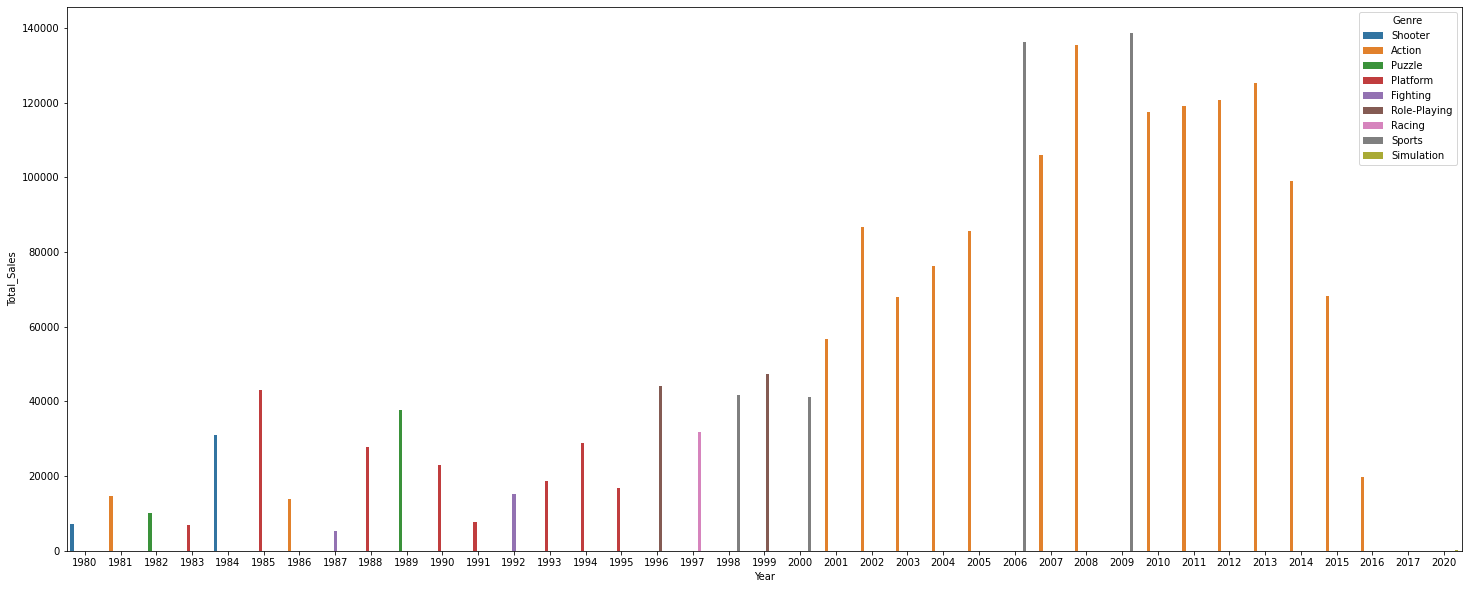

In [10]:
import seaborn as sns

# max 값으로 다 채운 뒤, 비교해서 일치하는 값
data_year_sale = df_year_sales.groupby(by=['Year'])['Total_Sales'].transform(max) == df_year_sales['Total_Sales']
# ture 인 값만 추출 후 인덱스 리셋
data_year = df_year_sales[data_year_sale].reset_index(drop=True)
# 그래프 그리기
bar_width = 0.35

plt.figure(figsize=(25, 10))
sns.barplot(data=data_year,
            x='Year',
            y="Total_Sales",
            hue="Genre"
            )

연도별 게임의 트랜드가 있을까?

2000년대 까지는 다양한 장르가 트랜드가 되었지만,
2001년 이후로 대부분 액션 장르의 게임이 트랜드가 되었다.

2006년과 2009년에는 스포츠 장르의 게임이 액션장르의 게임을 넘어선것으로 보인다.

2006년과 2009년은 월드컵의 영향으로 스포츠 장르의 게임이 흥한것이 아닐까 추측한다.

In [17]:
# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
# 결측치 제거 데이터
df3 = df2
# 필요한 컬럼 네임,토탈
df_high_game = df3.loc[:,['Name','Platform','Genre','Publisher','Total_Sales']]
# 오름차순 정렬
df_high_game = df_high_game.sort_values('Total_Sales', ascending=False)
# 인덱스 정리
df_high_game = df_high_game.reset_index()
df_high_game = df_high_game.drop(['index'], axis=1)
# 상위 20개 
df_high_20 = df_high_game.head(20)
df_high_20

,Name,Platform,Genre,Publisher,Total_Sales
0,Wii Sports,Wii,Sports,Nintendo,82740.0
1,Super Mario Bros.,NES,Platform,Nintendo,40240.0
2,Mario Kart Wii,Wii,Racing,Nintendo,35830.0
3,Wii Sports Resort,Wii,Sports,Nintendo,33000.0
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,31380.0
5,Tetris,GB,Puzzle,Nintendo,30260.0
6,New Super Mario Bros.,DS,Platform,Nintendo,30010.0
7,Wii Play,Wii,Misc,Nintendo,29010.0
8,New Super Mario Bros. Wii,Wii,Platform,Nintendo,28610.0
9,Duck Hunt,NES,Shooter,Nintendo,28310.0


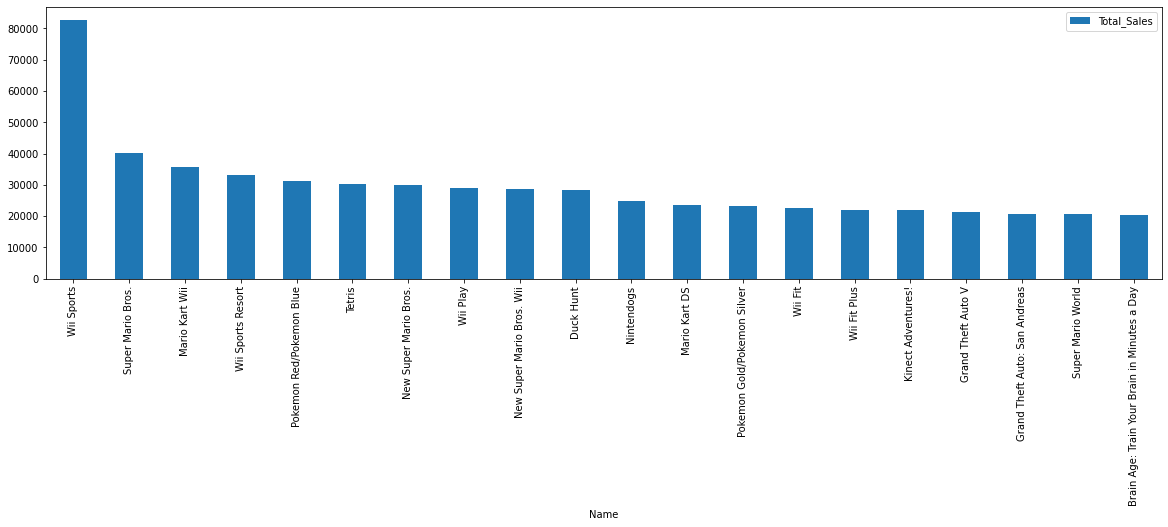

In [18]:
# 상위 20개 게임의 판매량과 장르

#판매량
df_high_20.plot.bar(x='Name', y='Total_Sales', rot=90, fontsize=10, figsize=(20,5))

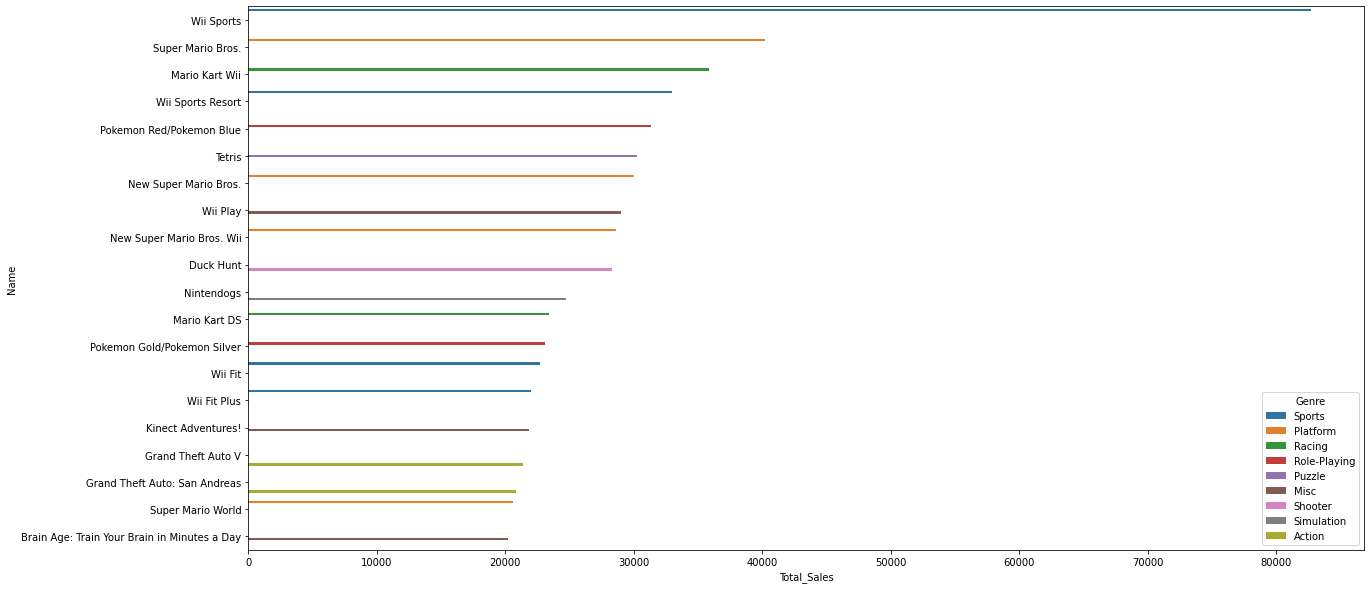

In [19]:
#장르
plt.figure(figsize=(20,10))
sns.barplot(data=df_high_20,
            x='Total_Sales',
            y="Name",
            hue="Genre",
            orient="h")

Wii Sports 게임의 판매량이 다른 게임의 비해 월등히 높았다.


또한 앞서 보았던 결과에서는 액션 장르의 게임이 대세적이였던 반면, 다양한 장르들이 골고루 분포되어있는 것을 볼수 있다. 

데이터를 확인한 결과 스포츠 장르인 Wii Sports 게임과 액션 장르인 Grand Theft Auto(GTA) 두 게임 모두 시리즈가 존재하는 것으로 확인 되었다.
그래서 두 게임을 비교해 보았다.

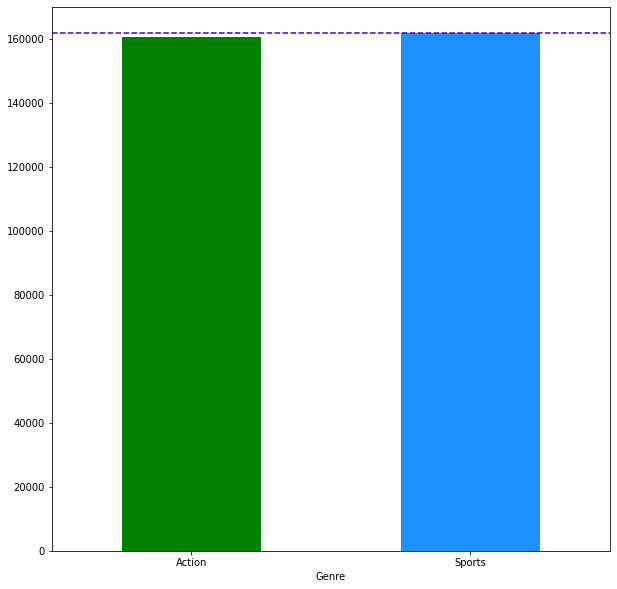

In [49]:
# will와 GTA 비교
# Wii 데이터 필터
str_name = df_high_game[df_high_game['Name'].str.contains('Wii')]
str_plat = str_name[str_name['Platform'].str.contains('Wii')]
str_genre = str_plat[str_plat['Genre'].str.contains('Sports')]
str_pub = str_genre[str_genre['Publisher'].str.contains('Nintendo')]

# GTA 데이터 필터
str_name2 = df_high_game[df_high_game['Name'].str.contains('Grand Theft')]
str_genre2 = str_name2[str_name2['Genre'].str.contains('Action')]

#데이터 합치기
df4 = pd.concat([str_pub,str_genre2])
#인덱스 정리
df4 = df4.reset_index()
df4 = df4.drop(['index'], axis=1)

# 장르로 비교
df4_genre = df4.groupby(by=['Genre'])['Total_Sales'].sum()

# 그래프 생성
line_val = df4_genre[1] #스포츠의 값

df4_genre.plot.bar(x='Genre', y='Total_Sales', rot=0, fontsize=10, figsize=(10,10), color=['g','dodgerblue'])
plt.axhline(line_val, linestyle='--', color='#4000c7')

앞서 월등한 결과와는 다르게 액션장르와 스포츠 장르의 판매량 차이는 미미한 것으로 나타났다.

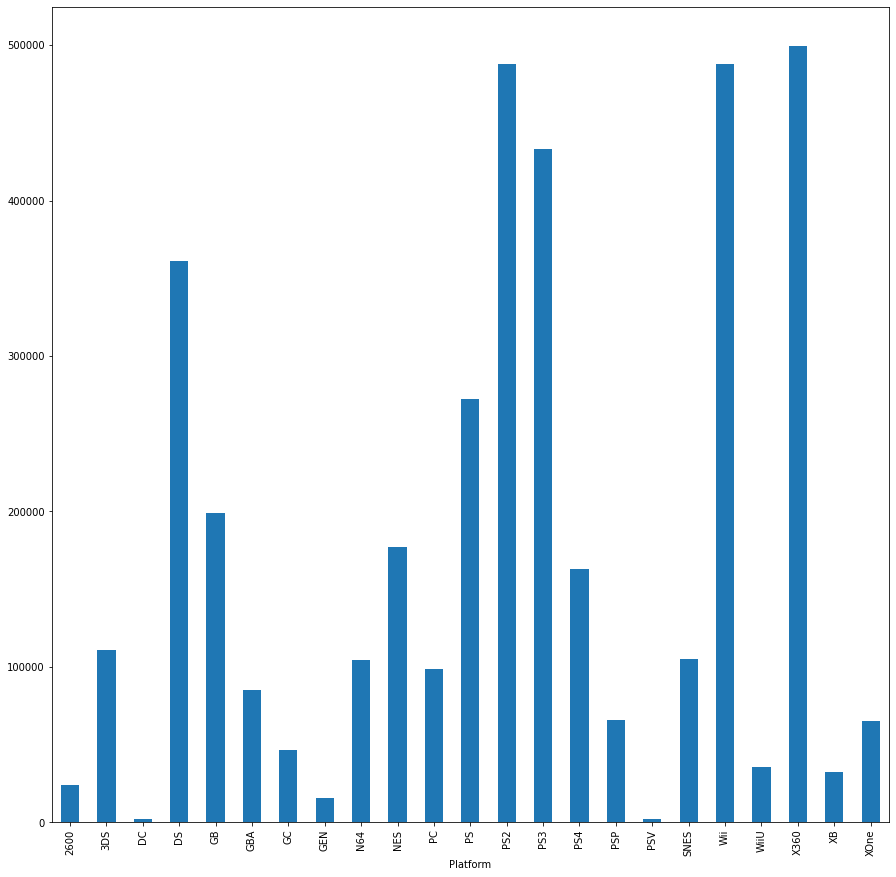

In [ ]:
#상위 5% 게임의 플랫폼은 어떻게 분포되어있는가?_ 약 800개의 데이터
df_high_800 = df_high_game.head(800)
df_high_plat = df_high_800.groupby(by=['Platform'])['Total_Sales'].sum()

df_high_plat.plot.bar(x='Platform', y='Total_Sales', rot=90, fontsize=10, figsize=(15,15))

판매량 상위 5% 게임의 주요 플랫폼은 닌텐도(Wii,DS), 플레이스테이션(PS3,PS2), 엑스박스(X360)으로 나타났다. 

다음분기에 어떤 게임을 설계해야할까

1. 2001년 이후로 액션장르의 게임이 주요 트랜드가 되고 있고, 지역에 따라 차이가 없이 선호되고 있는 장르이기 때문에 액션장르의 게임을 설계하는 편이 좋은 전략이 될 것이라고 생각한다.

2. 상위 게임의 주요 플랫폼인 닌텐도, 플레이스테이션, 엑스박스의 시장을 공략하여 출시하는 것이 좋은 전략이 될 것이라고 생각한다.
